<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

In [133]:
(train_data , train_label) , (test_data , test_label) = fashion_mnist.load_data()

In [134]:
targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

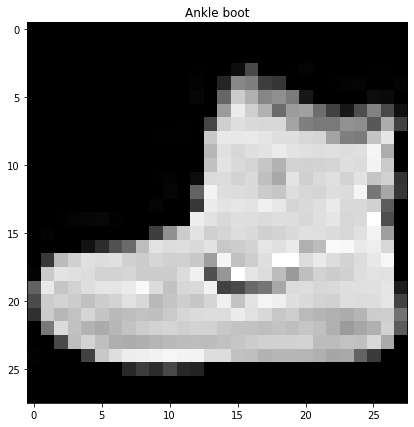

In [135]:
plt.figure(figsize = (10 , 7))
plt.imshow(train_data[0] , cmap = "gray")
plt.title(targets[train_label[0]])

In [136]:
a = np.random.randint(0 , 100 , size = [1])
a

array([87])

In [137]:
def plot_random_fashion_mnist(data, label, number_of_images = 16):
  '''this method will plot some fashoin mnist images randomly
  '''

  plt.figure(figsize = (10 , 7))

  for i in range(number_of_images):

    plt.subplot(4 , 4 , i + 1)

    rand = np.random.randint(0 , len(data) , size = [1])

    plt.imshow(np.squeeze(data[rand] , axis = 0), cmap = "gray")
    plt.title(targets[int(label[rand])])
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=2)

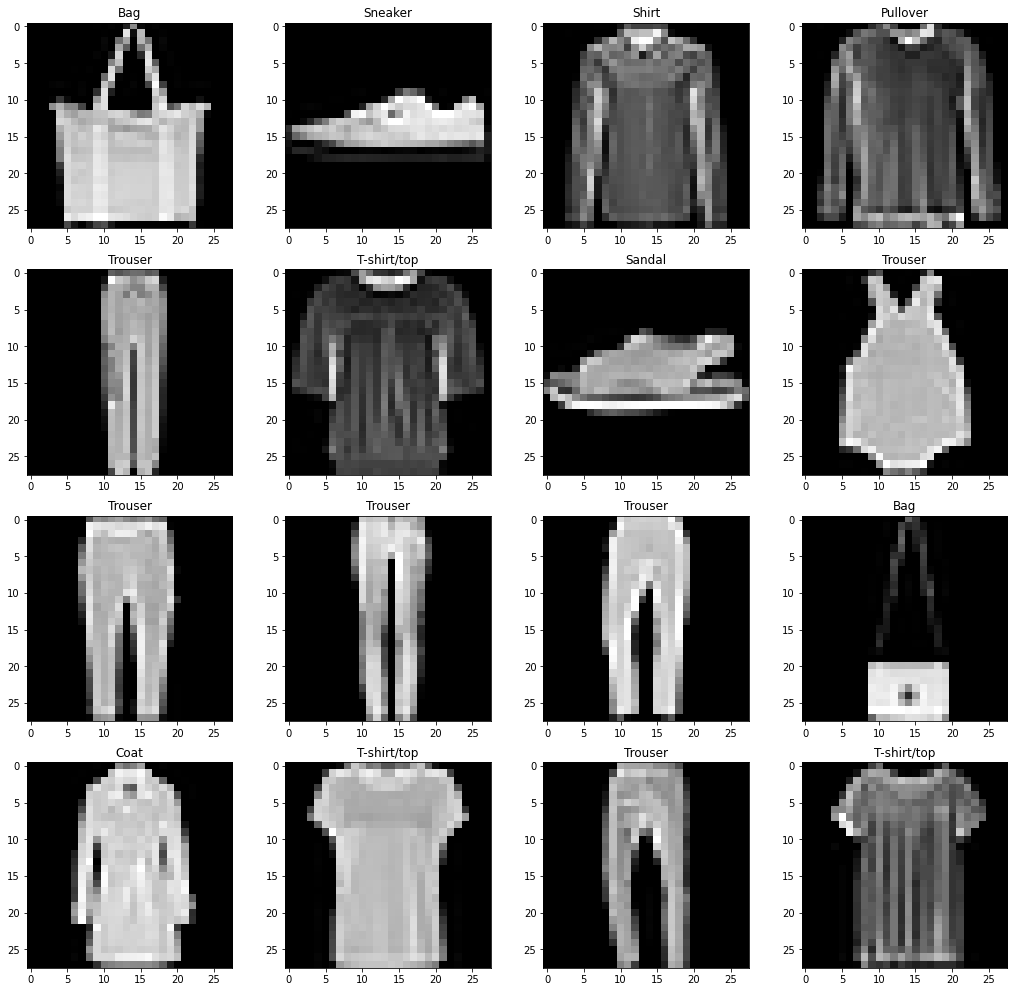

In [138]:
plot_random_fashion_mnist(train_data , train_label)

In [139]:
train_label = tf.keras.utils.to_categorical(train_label , num_classes = 10)

In [140]:
test_label = tf.keras.utils.to_categorical(test_label , num_classes = 10)

In [141]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28 , 28) , name = "input_layer"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
] , name = "model0")

In [142]:
model0.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = ["acc"])

In [143]:
history0 = model0.fit(train_data , train_label , epochs = 5 , validation_data = (test_data , test_label))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 3.4277 - acc: 0.6814 - val_loss: 0.7954 - val_acc: 0.7006
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7151 - acc: 0.7280 - val_loss: 0.6614 - val_acc: 0.7425
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6217 - acc: 0.7567 - val_loss: 0.6156 - val_acc: 0.7895
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5696 - acc: 0.7900 - val_loss: 0.6109 - val_acc: 0.7947
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5288 - acc: 0.8168 - val_loss: 0.5705 - val_acc: 0.8130


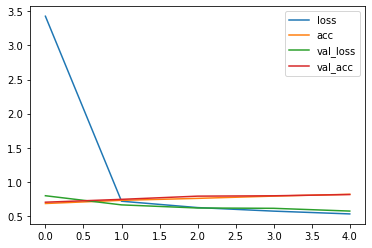

In [144]:
pd.DataFrame(history0.history).plot()

In [145]:
preds = model0.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [146]:
def calculate_accuracy(preds , labels):
  '''calculate accuracy in Tensorflow
  '''

  all_data_lenght = len(labels)

  if len(preds.shape) > 1:
    preds = tf.argmax(tf.round(preds) , axis = 1).numpy()
    labels = tf.argmax(tf.round(labels) , axis = 1).numpy()
  
  number_of_correct_predictions = tf.unique_with_counts(tf.equal(preds , labels)).count.numpy()[0]

  accuracy = (number_of_correct_predictions / all_data_lenght) * 100

  return accuracy

In [147]:
calculate_accuracy(preds , test_label)

78.64